<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Statistical Modeling and Model Validation

---

## Objective
The goal of this assessment is to guide you through the modeling workflow to produce the best possible model. In this lesson, you will apply the best practices you've learned to date to slice your data and validate your model. 

You'll demonstrate the following skills:

**Linear Regression**
* Handling categorical features in a scikit-learn model.
* Carrying out a train/test split.
* Training a model.
* Evaluating that model on the testing data.

**K-Nearest Neighbors:**
* Preparing your data for modeling.
* Scaling your data.
* Tuning a hyperparameter using k-fold cross-validation.
* Selecting a model based on a tuning parameter.
* Using a model to make predictions on new data.

## Imports

In [86]:
%matplotlib inline


import random

from matplotlib import pyplot as plt #data visualization
import numpy as np #categorical variables
import pandas as pd #library tools
import seaborn as sns #datavisualization

from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score


# Part 1: Regression on MPG Data

## Read the Data
The [`mpg` data set](https://archive.ics.uci.edu/ml/datasets/auto+mpg) represents the fuel economy (in miles per gallon) for 38 popular models of car, measured between 1999 and 2008.

|Factor      |Type                              |Description                                               |
|------------|----------------------------------|----------------------------------------------------------|
|manufacturer|multi-valued discrete             |Vehicle manufacturer                                      |
|model       |multi-valued discrete             |Model of the vehicle                                      |
|displ       |continuous                        |Size of engine [litres]                                   |
|year        |multi-valued discrete             |Year of vehicle manufacture                               |
|cyl         |multi-valued discrete             |Number of ignition cylinders                              |
|trans       |multi-valued discrete             |Transmission type (manual or automatic)                   |
|drv         |multi-valued discrete             |Driven wheels (f=front, 4=4-wheel, r=rear wheel drive)    |
|city        |continuous                        |Miles per gallon, city driving conditions (fuel economy)  |
|fl          |multi-valued discrete             |Vehicle type                                              |
|class       |multi-valued discrete             |Vehicle class (suv, compact, etc)                         |

In [54]:
# Read the mpg data in the data folder into this repository.
mpg = pd.read_csv('data/mpg.csv')

## Explore the Data
Use this space to familiarize yourself with the data set.

Convince yourself that there are no issues with the data. If you find any, clean them now.

In [5]:
# let's see the meaning of the columns of the data
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [28]:
mpg.head() #print the first five rows of the data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [37]:
mpg.shape #rows & Columns, no missing data

(234, 11)

In [38]:
mpg.isnull().any() #nothing seems to be missing; just like mpg info shows

manufacturer    False
model           False
displ           False
year            False
cyl             False
trans           False
drv             False
cty             False
hwy             False
fl              False
class           False
dtype: bool

In [39]:
mpg.dtypes #datatypes shown just like mpg info

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [29]:
# Count the missing values in each column of a DataFrame - sum() works because True is 1 and False is 0
mpg.isnull().sum() #no missing values

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [31]:
# Return number of unique elements for each column
# ->  excludes NA values by default
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [27]:
# let's print the summary statistics of the data
#So the minimum value is 1.6 and maximum is 7.0, but on average it is 3.4 with a variation of 1.3
display(mpg.describe())

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [8]:
# we can see that the manufacturer, model,trans,drv, fl, and class columns are object datatype
# let's try to see what the odd value is in the object columns
mpg.manufacturer.unique()

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [40]:
# we can see that the manufacturer, model,trans,drv, fl, and class columns are object datatype
# let's try to see what the odd value is in the object columns
mpg.model.unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [9]:
# we can see that the manufacturer, model,trans,drv, fl, and class columns are object datatype
# let's try to see what the odd value is in the object columns
mpg.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [10]:
# we can see that the manufacturer, model,trans,drv, fl, and class columns are object datatype
# let's try to see what the odd value is in the object columns
#showing frontwheel, 4 wheel drive, and rear wheel drive datatypes
mpg.drv.unique()

array(['f', '4', 'r'], dtype=object)

In [11]:
# we can see that the manufacturer, model,trans,drv, fl, and class columns are object datatype
# let's try to see what the odd value is in the object columns
#fuel datatypes
mpg.fl.unique()

array(['p', 'r', 'e', 'd', 'c'], dtype=object)

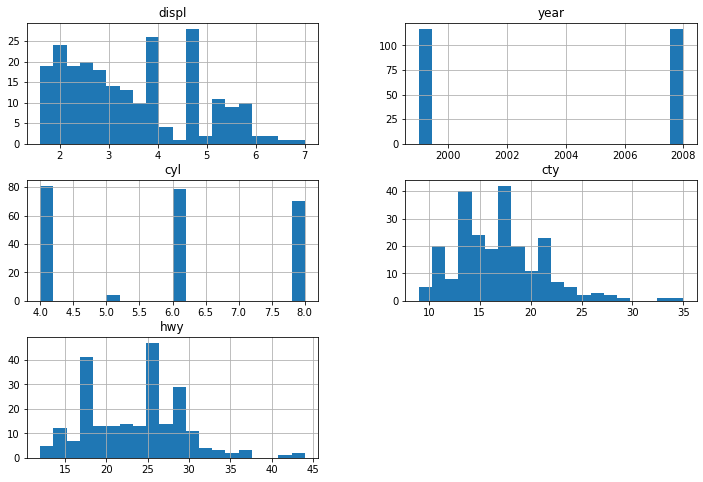

In [14]:
# let's visualize the distribution of the features of the mpg list
mpg.hist(figsize=(12,8),bins=20)
plt.show()

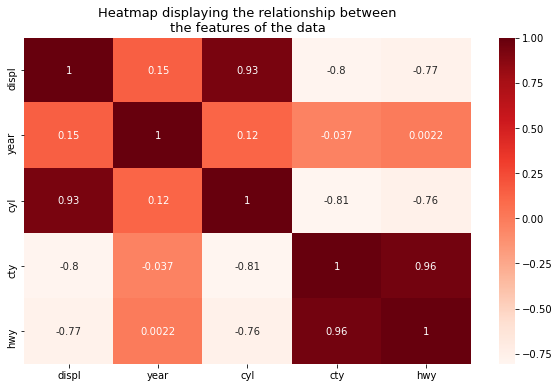

In [15]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and....
#.... the other features.
plt.figure(figsize=(10,6))
sns.heatmap(mpg.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

## Dummify the `drv` Variable

In [63]:
mpg_dc = pd.get_dummies(mpg, columns=['drv'])


In [64]:
mpg_dc.head()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class,drv_4,drv_f,drv_r
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact,0,1,0
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact,0,1,0
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact,0,1,0
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact,0,1,0
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact,0,1,0


## Split Your Data Into Factors (`X`) and Target (`y`)
You only need to keep the `displ` and `drv` variable(s) here, as those are the only columns you'll be fitting your model on in the next section.

In [94]:
mpg_dc_factors = mpg_dc[['displ', 'drv_f']]

In [95]:
x = "displ"
y = "drv_f"
 

## Instantiate a Linear Regression Model Object Predicting Highway MPG
Instantiate a `LinearRegression` object here.

In [97]:
mpg_model = LinearRegression()

#object attribute 'split'




## Evaluate Your Model

- Run five-fold cross-validation on your data.
  - Report the mean of the mean squared error across five folds.
  - Report the mean R-squared value across five folds.

In [78]:
x_train = x[:40]
y_train = y[:40]

x_test = x[60:]
y_test = y[60:]


# Part 2: Classification Using KNN

## Read in the `diamonds` Data
This is data regarding 50,000 round-cut diamonds.

|Factor            |Description                                                                                 |
|------------------|--------------------------------------------------------------------------------------------|
|price             |price in US dollars (326-18,823)                                                            |
|carat             |weight of the diamond (0.2--5.01)                                                           |
|cut               |quality of the cut (Fair, Good, Very Good, Premium, Ideal)                                  |
|color             |diamond colour, from J (worst) to D (best)                                                  |
|clarity           |how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))            |
|x                 |length in mm (0--10.74)                                                                     |
|y                 |width in mm (0--58.9)                                                                       |
|z                 |depth in mm (0--31.8)                                                                       |
|depth             |total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)                          |
|table             |width of top of diamond relative to widest point (43--95)                                   |

In [ ]:
dia = pd.read_csv('data/diamonds.csv')

## Explore the Data

## Filter Your Data
Filter your data to only contain diamonds with `'Ideal'` and `'Good'` cuts.

## Downsample the Majority Class

## Prepare Your `X`, `y` Matrices
Construct an `X` matrix using **all numeric columns** from the `diamonds` data.

You will be predicting `cut`. Construct a `y` vector in a numeric format that can be used by scikit-learn.

## Scale Your `X` Matrix Using a StandardScaler

## Why Did We Just Do That?
In the cell below, provide a 2–3 sentence explanation of why scaling our $X$ matrix was necessary here. What could have gone wrong if we didn't?

Scaling for KNN is important because KNN uses the distance between two points. If two features are on different scales, the distances between them on each coordinate might be given falsely disproportionate weights. If we didn't scale, it's possible that KNN would make all of its decisions based on the feature with the widest scale.

## Split Into Testing and Training Groups

Now that we've downsampled/balanced our classes, as well as removed unused factors, we're ready to split into testing and training groups. We're doing this avoid _leaking information into our testing set_. 

- First, we'll perform cross-validation on our _training_ set, finding an optimal value for $k$. 
- After this, we'll take that value of $k$ and use it to fit our model to the _training_ set, creating our tuned model.
- Finally, we will take this same model and use it to _predict_ and _score_ against our _testing_ set.
- Note that our model at this point will have never seen nor trained against the _testing_ set.

In the future, we can (and should!) automate this process using a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) — a tool used to abstract our modeling process, allowing data to be processed without manual intervention.

## K-Nearest Neighbors
You're going to fit a KNN model here, but you first need to tune your model to find the best value of $k$. Loop through values of $k$ you think are appropriate (Hint: Look for "elbows" in your result curves) and select the value that produces the best model with respect to **five-fold cross-validation**.

**Important**: Do not use _any_ code copied and pasted directly from the lecture! Typing things out yourself is 100% essential to the learning process. It's OK to use the exact same strategies as we did in class, but be sure to enter them manually.

## Produce the Plot of Tuning Parameter ($k$) vs. Accuracy
What is the "best" value of k?

## Produce the Best KNN Model
Now that you know the optimal value of $k$, fit a KNN on the training set (this training set should still filtered to `'Ideal'` and `'Good'` cuts).

## Does This Model Outperform the Baseline?

## Prediction
Suppose I have a diamond with the following specifications:

In [ ]:
new_diamond = pd.DataFrame({
    'carat': 0.24,
    'depth': 60.,
    'table': 64.,
    'price': 400.,
    'x': 3.,
    'y': 3.,
    'z': 3.
}, index=[0])

What do you predict to be the cut of this diamond?

**Big hint:** Don't forget to scale this new data point appropriately!

# Part 3: Now _YOU_ Model!
Put your skills to the test.

Using the _full_ `diamonds` data set, produce a **logistic regression** model that achieves the best five-fold cross-validation. Note that, for this problem, you're performing multi-class classification. The response variable has _five_ categories.